# Video Game Console Analysis

## Introduction

The analysis involves examining data to identify trends influencing a game's success. The dataset contains information dating back to 2016, including user and expert reviews, game genres, supported platforms (such as Xbox and PlayStation), and historical sales data from open sources. Additionally, it incorporates ESRB (Entertainment Software Rating Board) abbreviations, indicating age ratings ranging from Teen to Mature based on content.

The main objective is to uncover patterns in the data to inform strategic decisions, particularly in planning advertising campaigns for the upcoming year. Despite the current timeframe being December 2016, this analysis lays the groundwork for forecasting and strategizing campaigns for 2017. Effectively utilizing this dataset is essential for identifying potential blockbuster titles and optimizing marketing efforts to increase sales and revenue for Ice.

## Import Data

In [6]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math

## Data Preparation

In [7]:
# Import the data

filepath = '../data/games.csv'
column_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

try:
    games_df = pd.read_csv(filepath, header=0, names=column_names)
except FileNotFoundError as e:
    print(f"The file at [{filepath}] was not found. The following error: {e} occurred.\nTry again!")
else:
    print(f"The file at the filepath: [{filepath}] was imported.")

The file at the filepath: [../data/games.csv] was imported.


In [8]:
# Initial Observations

games_df.info()
games_df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
# Check percentages of missing values to access impact

mis_values = games_df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(games_df.isnull().sum()/len(games_df),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,0.513
rating,6766,0.405
user_score,6701,0.401
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
jp_sales,0,0.000
eu_sales,0,0.000
na_sales,0,0.000


**Observations**

The dataset comprises 11 columns, each providing specific information about various video games. Upon initial inspection, it becomes apparent that some columns have data types inconsistent with their descriptions.

- The `year_of_release` column is presently of type `float64` and should be converted to type `int64`.
- The `user_score` column is currently of object data type; it would be more appropriate to convert it to a numerical data type to facilitate calculations.

Regarding missing values, several columns exhibit incomplete data: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

For `name`, `genre`, and `rating`, missing values will be addressed using by either dropping or replacing the values:
- Rows with missing values in the `name` and `genre` columns will be removed, affecting only a small fraction of the dataset (approximately 1 to 3 records), thus preserving data integrity. 
- For the categorical `rating` column, missing values will be filled with the string `'unknown'`. Since these columns primarily serve to categorize data, introducing an `'unknown'` category for each will minimally disrupt the dataset. Removing these values would significantly impact dataset integrity due to their prevalence.

For the columns `critic_score`, `user_score`, and `year_of_release`, missing values will be addressed using dispersion methods such as mean or median:
- The `year_of_release` column will be filled with the median value for that column. This approach, impacting approximately 200 records, maintains data integrity. However, for a larger number of missing values, it might pose challenges.
- For missing `user_score` values, we will replace them with the mean for that column. Since the value ranges between 1 and 10, excluding zero, the mean is expected to be relatively stable and can effectively fill missing values in that column.
  - The string value `'tbd'` will be converted to `NaN` (missing value) and then replaced with the mean, similar to other values. Considering that the user score typically falls between 1 and 10, `'tbd'` can be interpreted as missing data. To ensure this distinction is preserved for future analysis, a new binary column named `score_is_tbd` will be created. In this column, `'tbd'` will be represented as `1`, indicating missing or to-be-determined scores, while actual scores or `NaN` values will be represented as `0`.
- For `critic_score`, missing values will be grouped by `genre` and `rating` and replaced with the median for those groups, providing a more contextualized approach to handling missing data. Any remaining missing values will be grouped by the `year_of_release` and filled with the median as well.


In [10]:
# handle name and genre missing values
games_df.dropna(subset=['name', 'genre'], inplace=True)

# handle rating missing values
games_df['rating'] = games_df['rating'].fillna('unknown')

# handle year_of_release missing values and data conversion
games_df['year_of_release'].fillna(games_df['year_of_release'].median(), inplace=True)
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

# handle critic_score missing values
games_df['critic_score'] = games_df['critic_score'].fillna(games_df.groupby(['genre', 'rating'])['critic_score'].transform('median'))
games_df['critic_score'].fillna(games_df['critic_score'].median(), inplace=True)


# handle user_score missing values and data conversion
games_df.insert(10, 'u_score_is_tbd', np.where(games_df['user_score'] == 'tbd', 1, 0))
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['user_score'] = round(games_df['user_score'].fillna(games_df['user_score'].mean()), 2)

In [11]:
# feature engineering

games_df.insert(8, 'total_sales', games_df['na_sales'] + games_df['jp_sales'] + games_df['eu_sales'] + games_df['other_sales'])
games_df.insert(0, 'game_id', games_df.index)

In [12]:
# Check for duplicates in the dataset

games_df.duplicated().sum()

0

In [13]:
# Re-observe data -- ensure everything is correct

games_df.info()
games_df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   total_sales      16713 non-null  float64
 10  critic_score     16713 non-null  float64
 11  user_score       16713 non-null  float64
 12  u_score_is_tbd   16713 non-null  int64  
 13  rating           16713 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 1.9+ MB


,game_id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,u_score_is_tbd,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.00,0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,70.0,7.13,0,unknown
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.30,0,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.00,0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,75.0,7.13,0,unknown
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.0,7.13,0,unknown
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.50,0,E
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.60,0,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.40,0,E
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,67.0,7.13,0,unknown


## Data Analysis

### Data Significance

Based on initial observations, the data indeed seems significant for understanding trends and patterns in video game releases over the specified period. The dataset demonstrates a substantial number of observations per year, indicating a robust sample size for analysis. While 1980 stands out with only 9 games released, subsequent years show a consistent increase in the number of releases. This upward trend suggests a growing and evolving video game industry during the period covered by the dataset. 

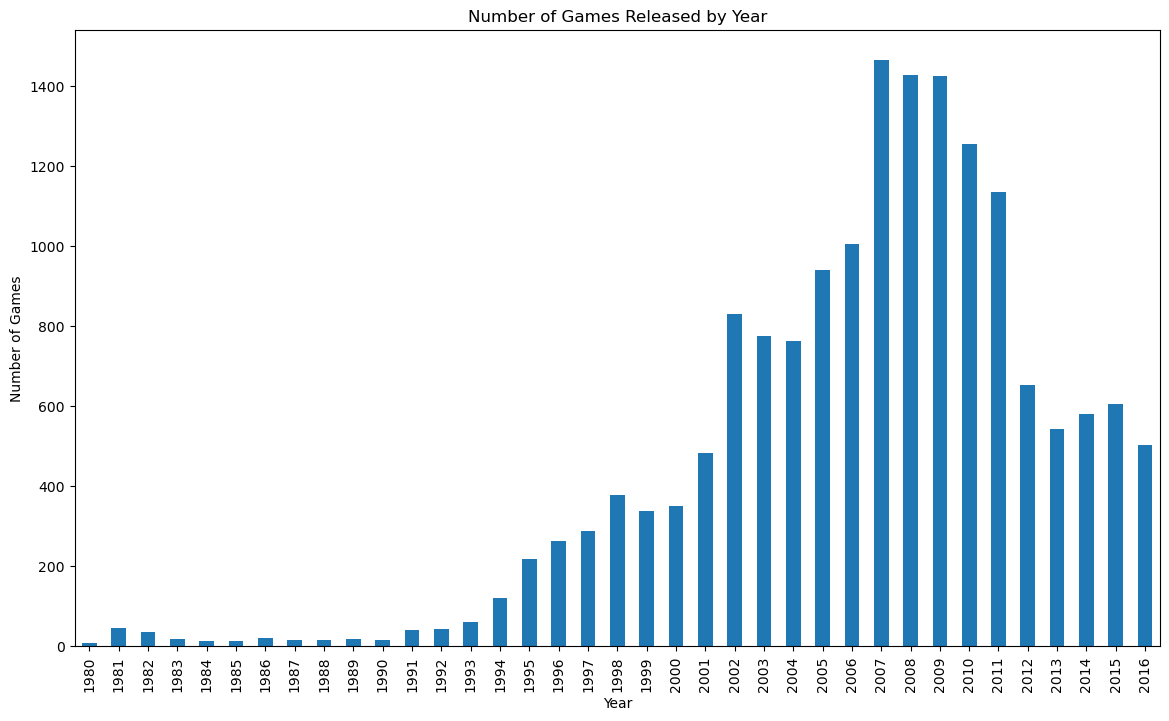

In [14]:
# Finding number of games released by year

release_by_year = games_df.groupby('year_of_release')['game_id'].count()
release_by_year.plot(kind='bar', x='year_of_release', title="Number of Games Released by Year", xlabel="Year", ylabel="Number of Games", figsize=(14,8))
plt.show()


### Platform to Platform Sales


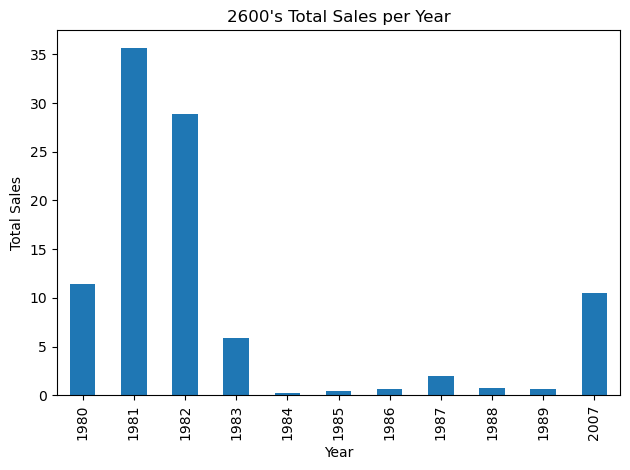

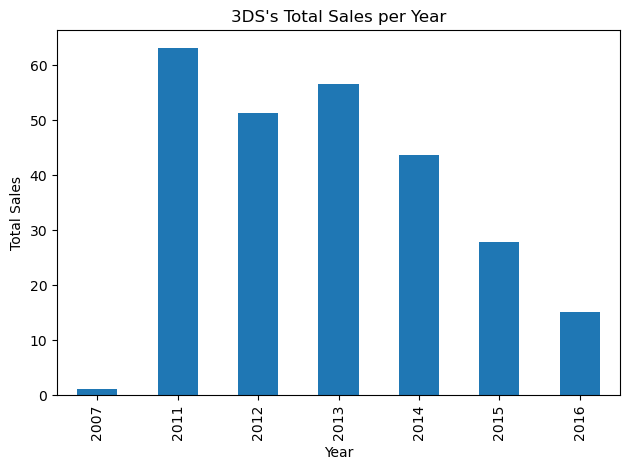

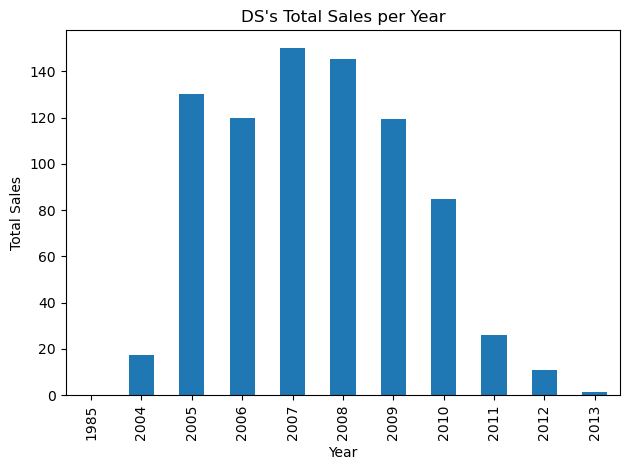

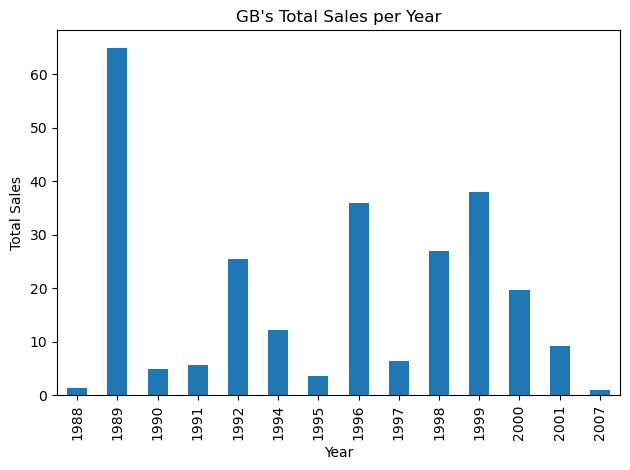

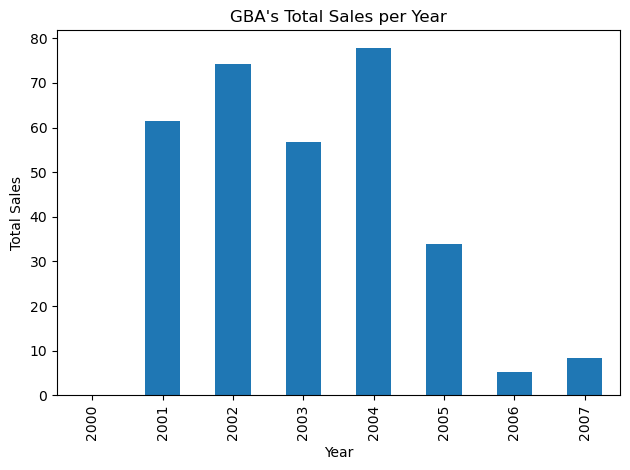

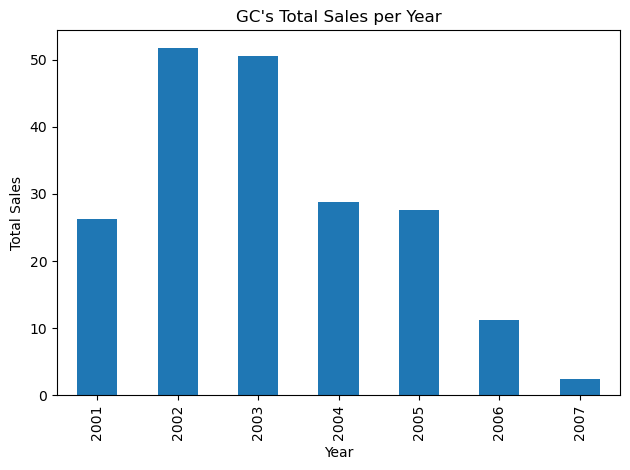

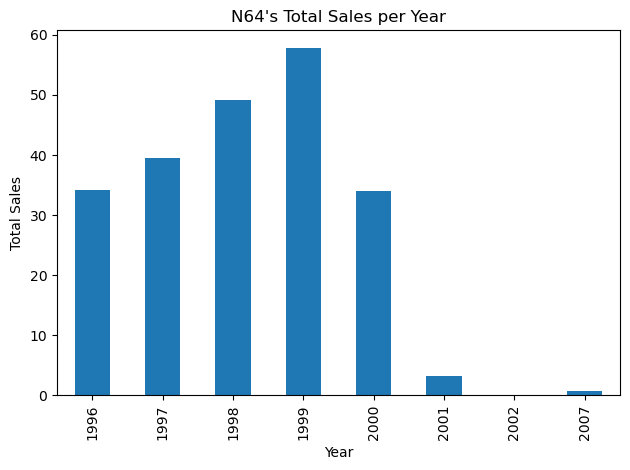

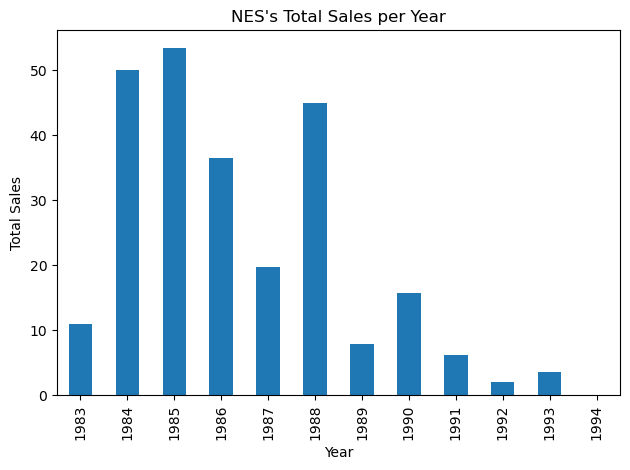

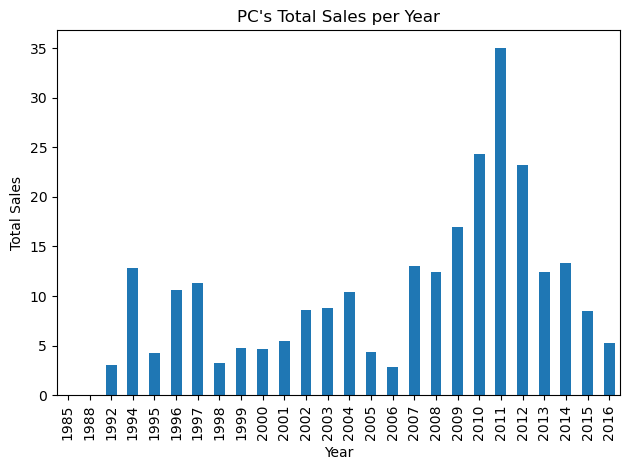

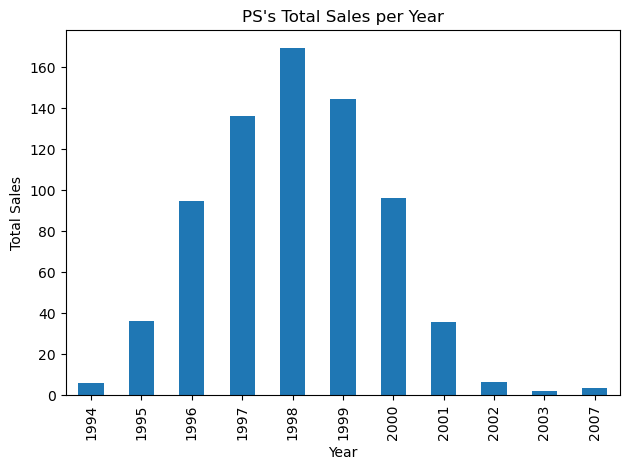

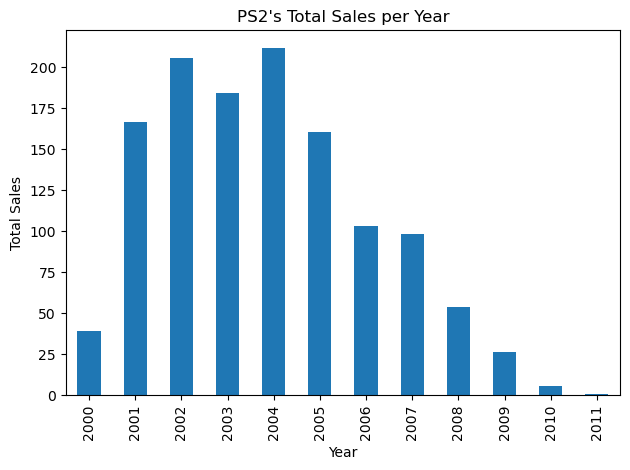

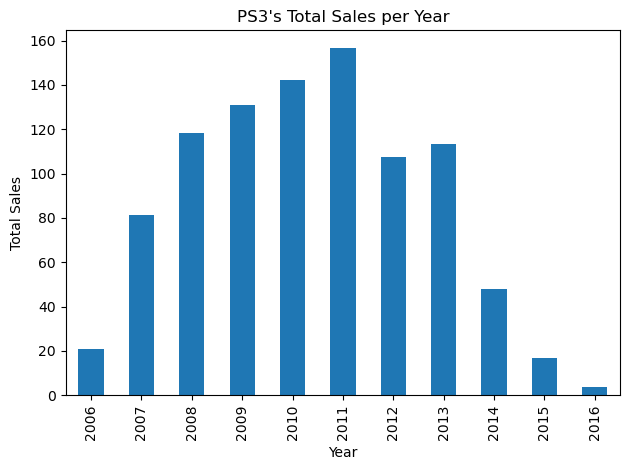

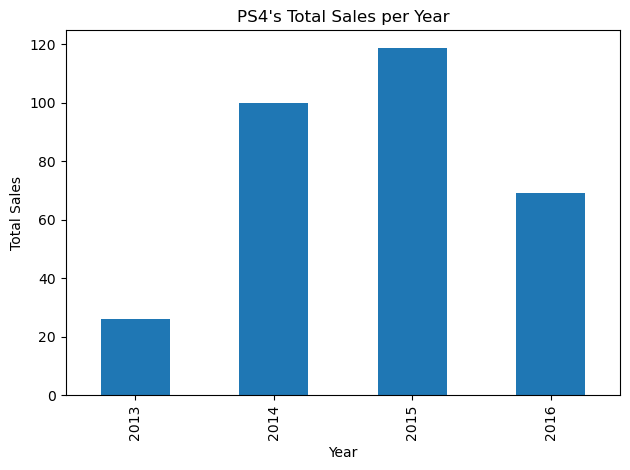

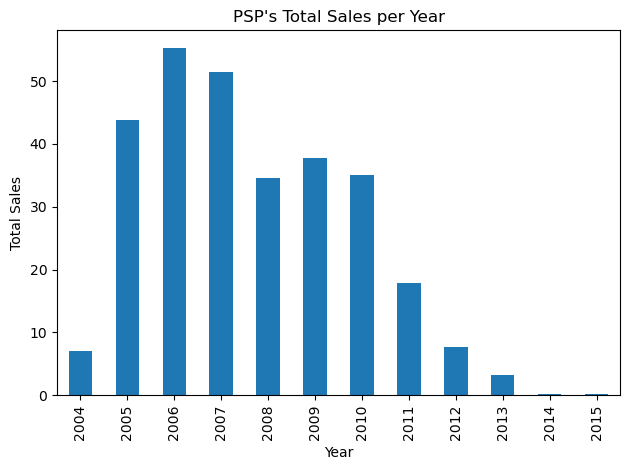

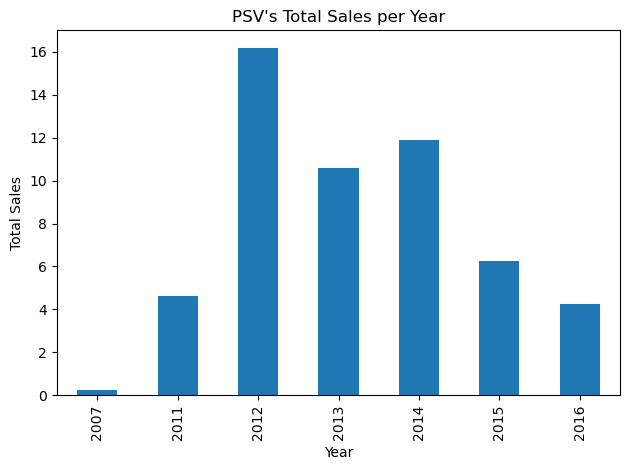

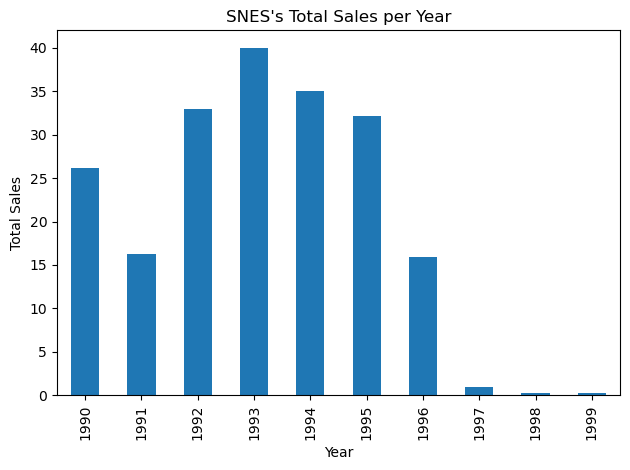

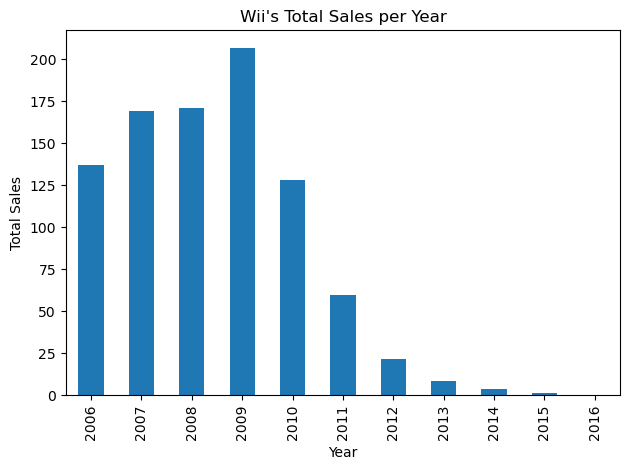

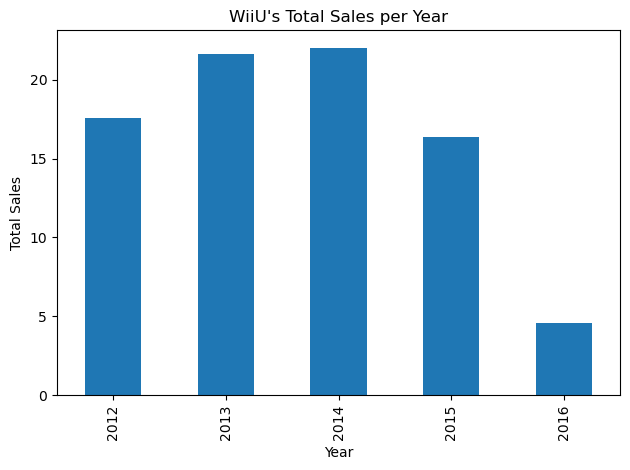

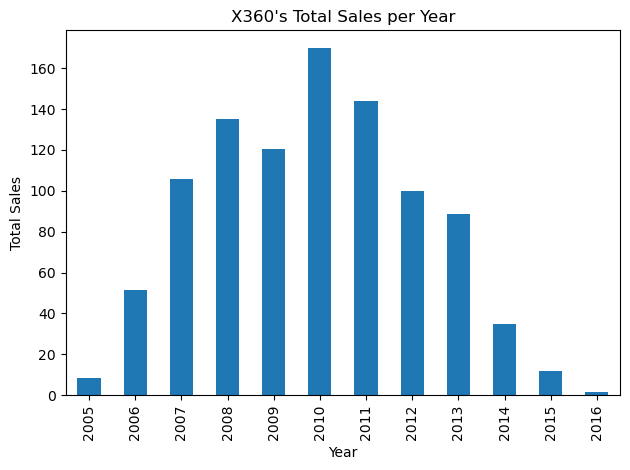

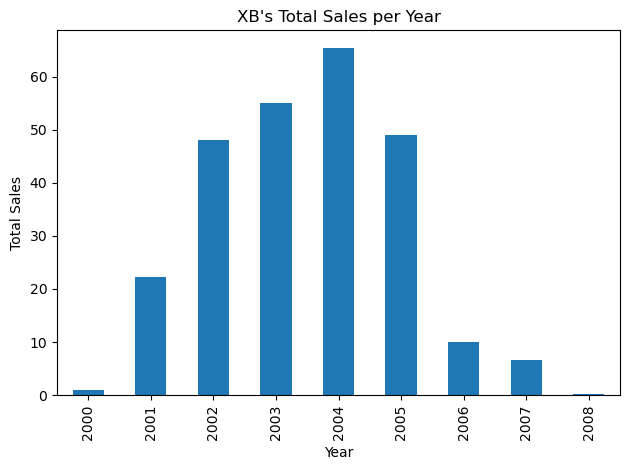

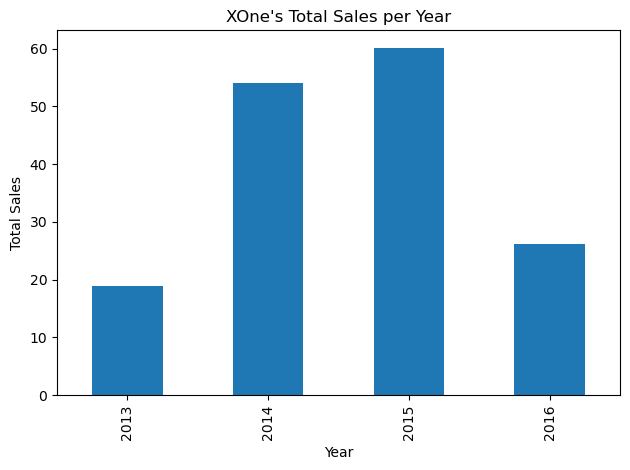

In [15]:
# Grouping data by platform & summing total sales
platform_sales = games_df.groupby('platform')['total_sales'].sum()

# Filtering out only platforms with over 50 million in sales & creating a list
platforms_over_50 = platform_sales[platform_sales > 50].index.tolist()

# Filtering out original df to only include platforms that sold over 50 mil
df_games_filtered = games_df[games_df['platform'].isin(platforms_over_50)] #* Base DF

# Group the filtered DataFrame by 'platform'
grouped_by_platform = df_games_filtered.groupby('platform')

# Determine total sales grouped platform
platform_sales = grouped_by_platform['total_sales'].sum().reset_index()

# Plot bar charts by platform
for platform, group_data in grouped_by_platform:
    group_data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title=f"{platform}'s Total Sales per Year")
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()


In [16]:
# Find platforms leading in sales
platform_sales = platform_sales.sort_values(by='total_sales', ascending=True)
platform_sales

,platform,total_sales
14,PSV,54.07
17,WiiU,82.19
0,2600,96.98
20,XOne,159.32
5,GC,198.93
15,SNES,200.04
6,N64,218.68
7,NES,251.05
3,GB,255.46
19,XB,257.74


In [17]:
# Pivot table for platform, release year and total  sales

sales_pivot_table = df_games_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)

sales_pivot_table

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,10.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.19,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,150.28,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,1.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,...,13.04,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


**Observations**

Based on the depicted graphs (for platforms exceeding 50 million in sales), it appears that platforms generally maintain sales momentum for approximately 10 years before tapering off. This suggests that a new platform tends to emerge in the market approximately every decade or so.

### Determining Appropiate Data

The findings from the data analysis suggest that for constructing a model aimed at predicting trends in 2017, it's crucial to incorporate data spanning the preceding decade, starting from 2015. This period is deemed most pertinent because consoles utilized between 1997 and 14 exhibit minimal sales activity and are likely to become obsolete by 2017, if not already. Consequently, the optimal approach for modeling 2017 involves leveraging data ranging from 2015 to 2016.

The platforms leading in all-time sales are:
- PS4
- GBA
- PS
- DS
- Wii
- PS3
- X360
- PS2

The platforms that are growing are:
- PC
- PS4
- XOne

The platforms that are shrinking are:
- X360
- PS2
- PSP
- PS3
- Wii
- WiiU

### Boxplotting Global Sales

<Figure size 1200x600 with 0 Axes>

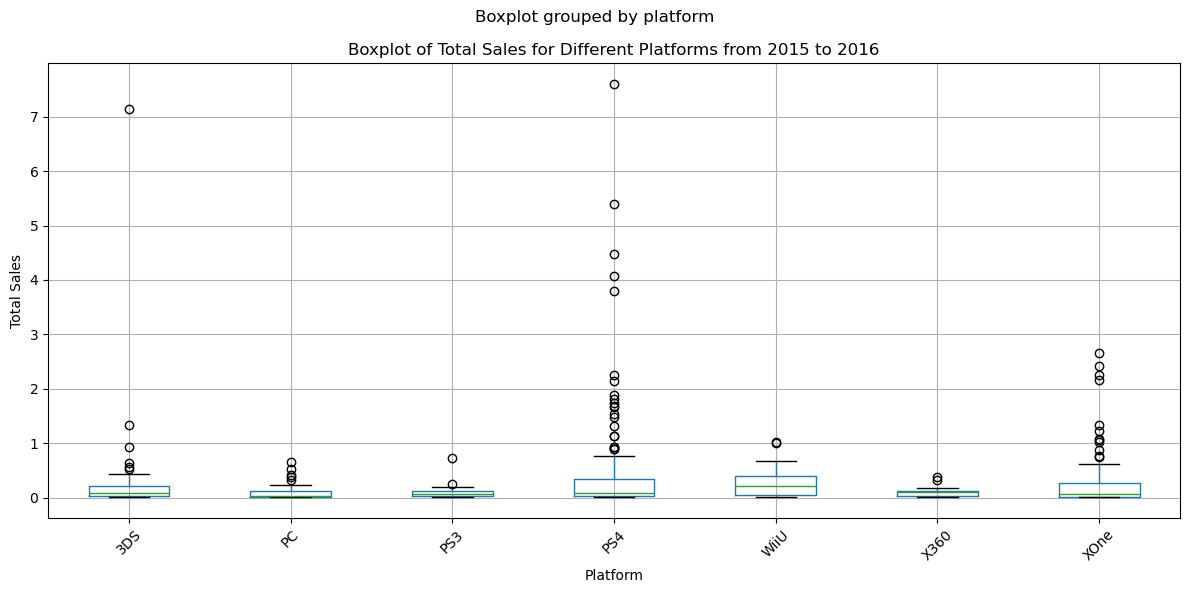

In [18]:
# Slicing data for profitable consoles & for 2015 - 2016
list_of_platforms = ['WiiU', 'X360', 'XOne', 'PS3', 'PS4', '3DS', 'PC']
platform_sales_filtered_15_16 = df_games_filtered[(df_games_filtered['platform'].isin(list_of_platforms)) & (df_games_filtered['year_of_release'] > 2015)]

# Boxplot for total sales in different platforms
plt.figure(figsize=(12, 6))  
platform_sales_filtered_15_16.boxplot(column='total_sales', by='platform', figsize=(12,6))
plt.title('Boxplot of Total Sales for Different Platforms from 2015 to 2016')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

There appears to be limited variation in total sales among the selected platforms from 2015 to 2016. Generally, most consoles achieved comparable total sales during this three-year period. However, it's noteworthy that consoles gaining popularity around this time, such as PS4, XOne, and 3DS, exhibited numerous outliers compared to the overall trend.

### Observing Correlation Between Total Sales and User Score

The correlation coefficient between 'user_score' and 'total_sales' in PS4 is: -0.13754221949955336


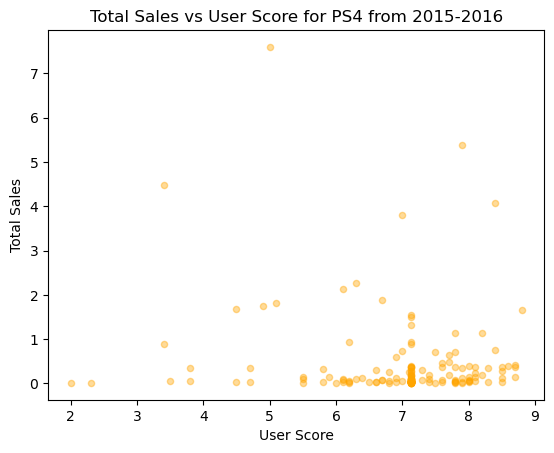

In [19]:
# Looking at correlation between user_score and total_sales for PS4 (2015-16)

ps4_df = platform_sales_filtered_15_16[platform_sales_filtered_15_16['platform'] == 'PS4']
print(f"The correlation coefficient between 'user_score' and 'total_sales' in PS4 is: {ps4_df['total_sales'].corr(ps4_df['user_score'])}") # printing the correlation value

ps4_df.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales', title='Total Sales vs User Score for PS4 from 2015-2016', alpha=0.4, color="orange")
plt.show()


**Observations**

There appears to be a negligible and negative correlation between user scores and total sales. Illustrated by the scatterplot and confirmed by the correlation coefficient, the correlation is almost negligible, indicating a close-to-zero relationship (signifying no correlation).

The correlation coefficient between 'user_score' and 'total_sales' for 3DS is: 0.025835880202398197


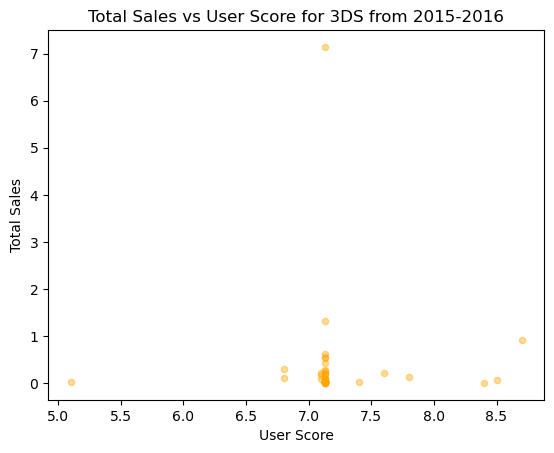

The correlation coefficient between 'user_score' and 'total_sales' for PC is: 0.07287032940706191


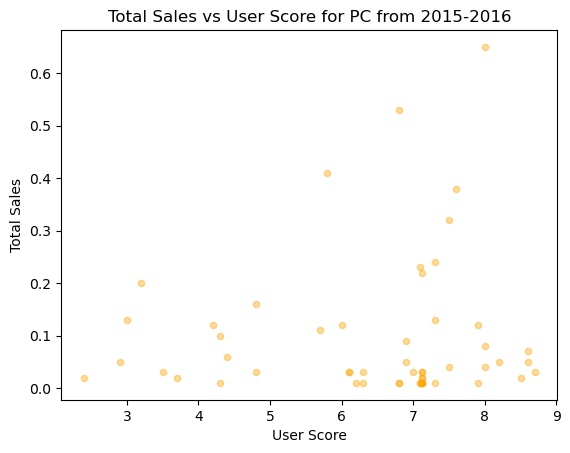

The correlation coefficient between 'user_score' and 'total_sales' for PS3 is: -0.39637058301929645


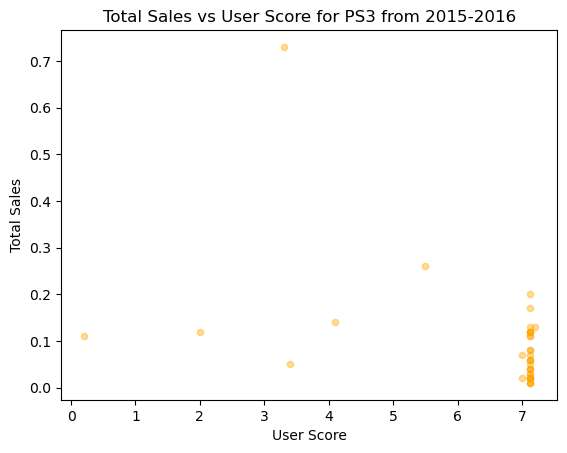

The correlation coefficient between 'user_score' and 'total_sales' for PS4 is: -0.13754221949955336


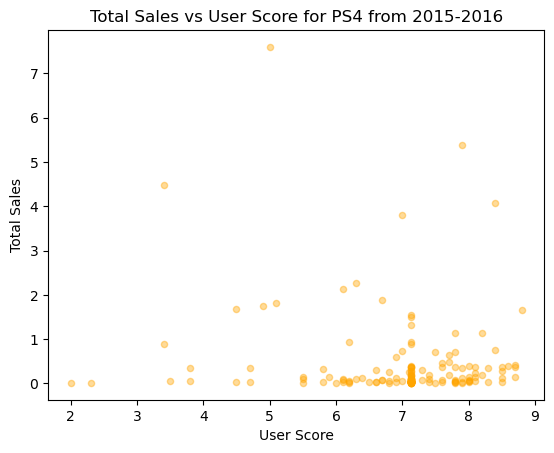

The correlation coefficient between 'user_score' and 'total_sales' for WiiU is: 0.4030733872098131


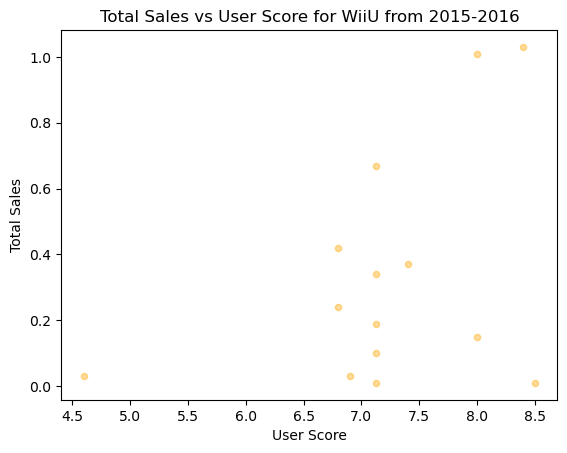

The correlation coefficient between 'user_score' and 'total_sales' for X360 is: -0.595775821144026


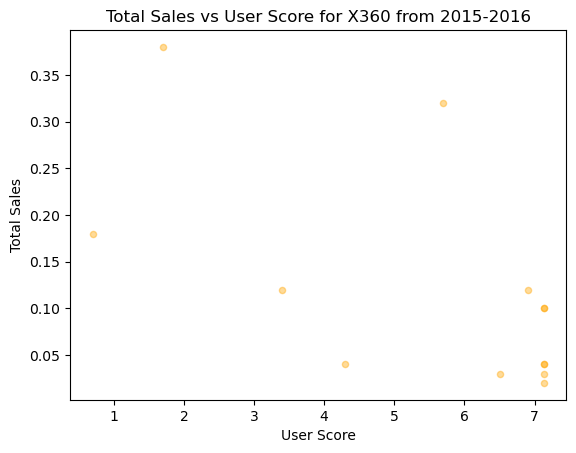

The correlation coefficient between 'user_score' and 'total_sales' for XOne is: -0.15657846027316608


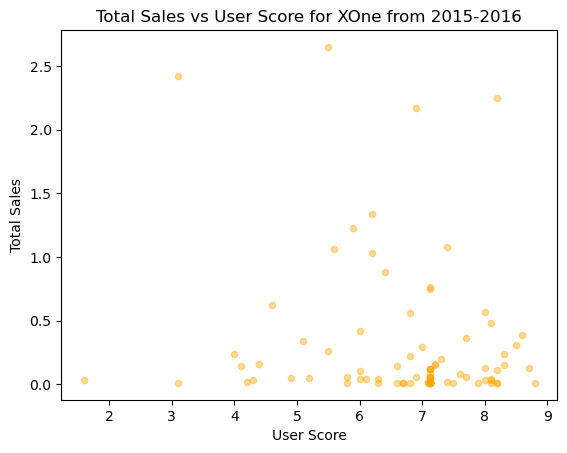

In [20]:
# Looking at correlation between user_score and total_sales for all platforms (2015-16)

for platform in np.sort(platform_sales_filtered_15_16['platform'].unique()):
    group_data = platform_sales_filtered_15_16[platform_sales_filtered_15_16['platform'] == platform]
    print(f"The correlation coefficient between 'user_score' and 'total_sales' for {platform} is: {group_data['total_sales'].corr(group_data['user_score'])}")
    group_data.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales', title=f'Total Sales vs User Score for {platform} from 2015-2016', alpha=0.4, color="orange")
    plt.show()

**Observations**

When analyzing the relationship between user scores and total sales across different gaming platforms, it becomes apparent that certain platforms exhibit varying degrees of correlation. PC, XOne, and PS4 show weak, negative correlations between user scores and sales figures. On the other hand, Wii and WiiU demonstrate a moderate, positive correlation, whereas X360 and PS2 display a moderate, negative correlation. This suggests that more established consoles such as PS3, WiiU, Wii, and X360 tend to exhibit stronger correlations, whether positive or negative, while newer consoles like PS4 and XOne show weaker correlations.

### General Distribution by Genre

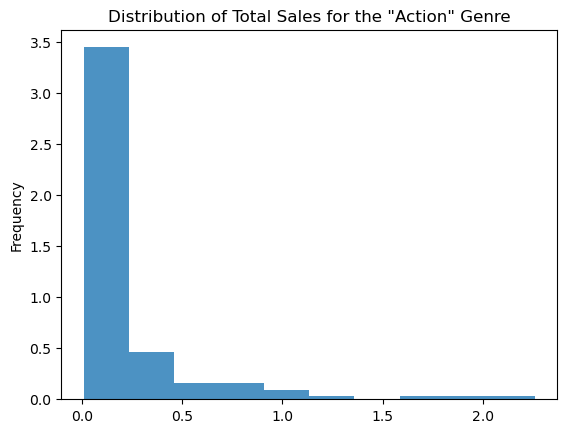

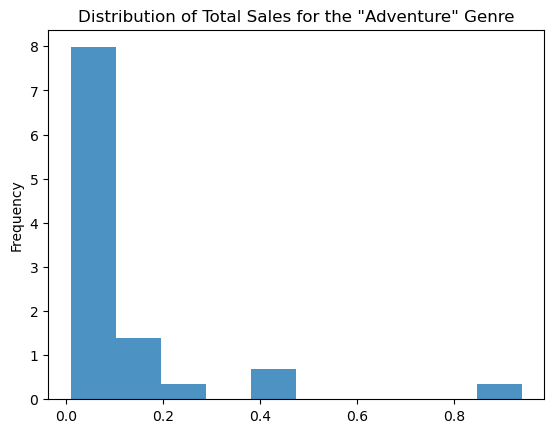

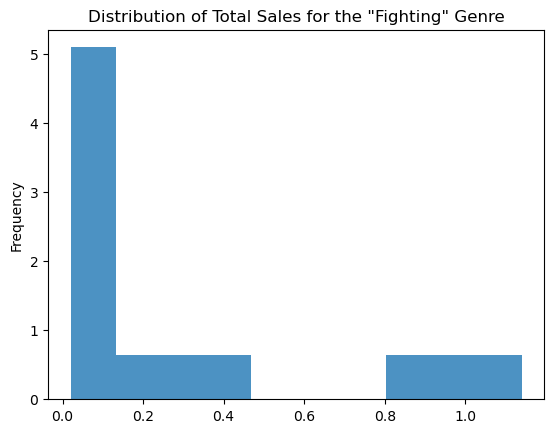

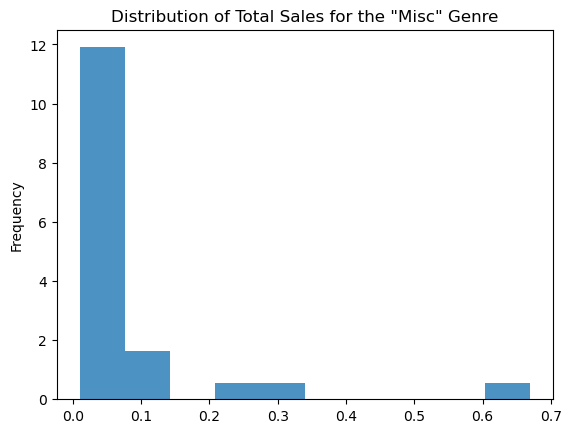

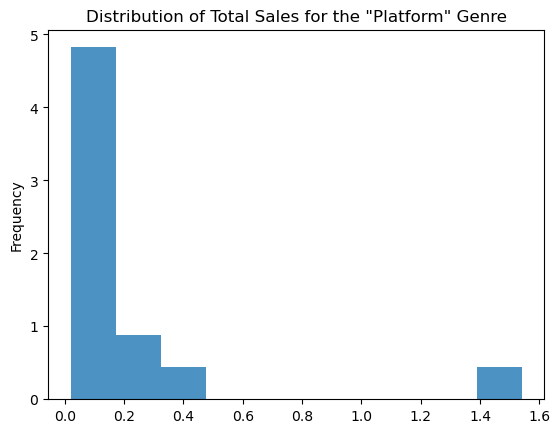

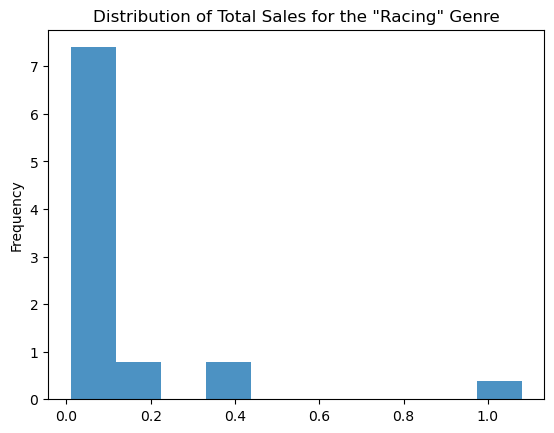

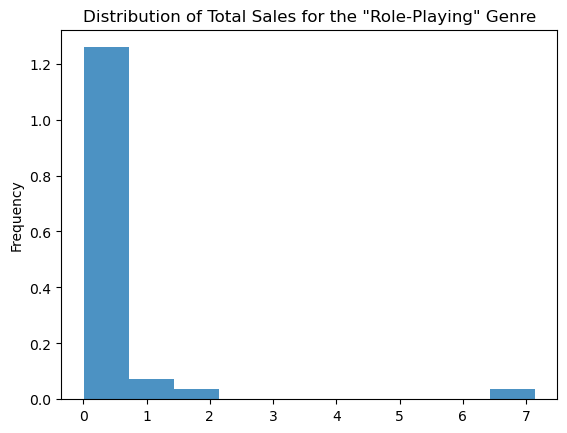

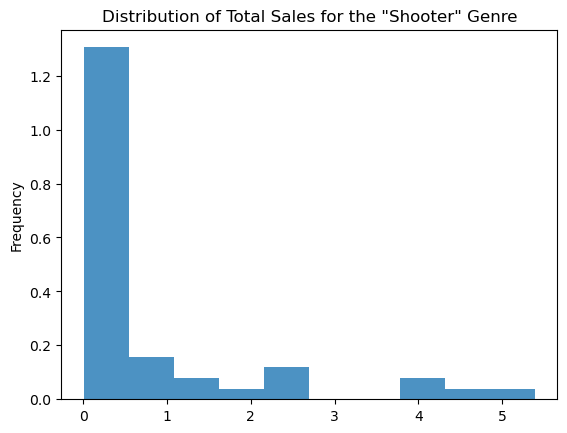

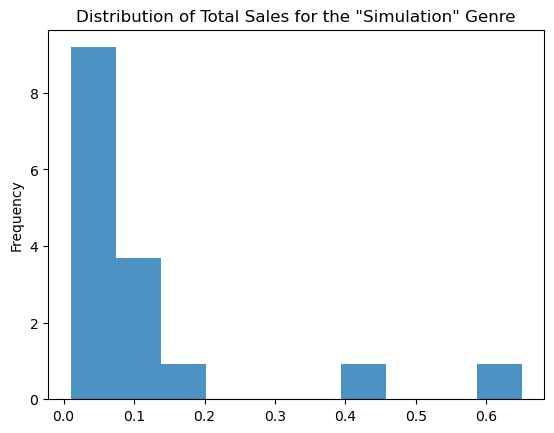

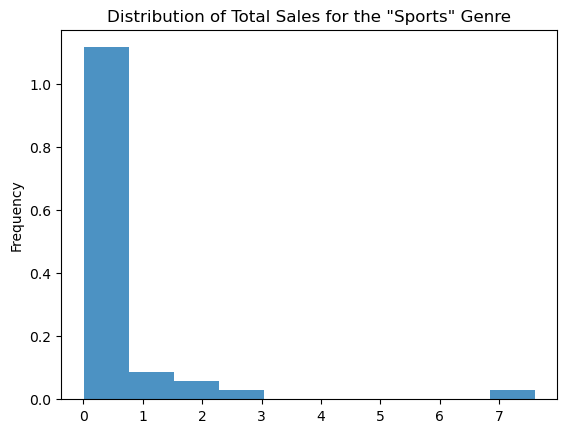

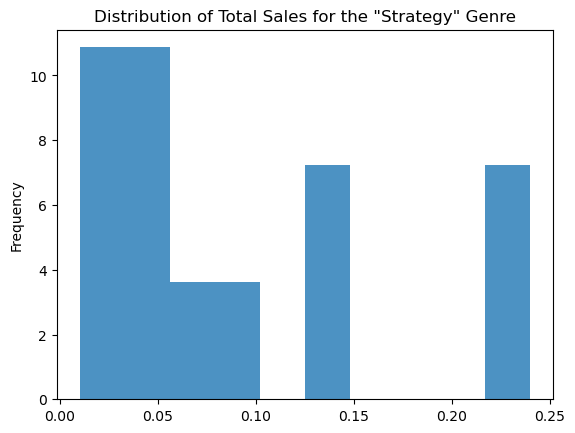

In [21]:
for genre in np.sort(platform_sales_filtered_15_16['genre'].unique()):
    platform_sales_filtered_15_16[platform_sales_filtered_15_16["genre"] == genre].plot(kind='hist', y='total_sales', density=True, alpha=0.8, title=f'Distribution of Total Sales for the "{genre}" Genre', legend=False)
    plt.show()

**Observations**

The top-selling game genres include `Shooter`, `Sports`, `Racing`, `Fighting`, `Role-Playing`, and `Action`. Among these, action-oriented games stand out as particularly popular, while genres requiring critical thinking such as `Puzzle` and `Strategy` are comparatively less favored. This preference may stem from the widespread appeal of action-packed experiences over those that challenge cognitive skills. For instance, the enduring popularity of sports-themed games could be attributed to the widespread passion for sports teams, both in playing and supporting them.

## User Profile by Region

In [22]:
# Top 5 Consoles by sales: PS2, PS3, X360, Wii, DS
top_five_platform = ["PS2", "PS3", "X360", "Wii", "DS"]
top_5_platform_df = df_games_filtered[df_games_filtered['platform'].isin(top_five_platform)]

# Finding total sales for each region by platform
top_5_grouped_sales = top_5_platform_df.groupby(['platform']).agg({"jp_sales": "sum", "eu_sales": "sum", "na_sales": "sum"})

# Declaring a fn to find market_share
def find_market_share(region: str, df: object) -> int:
    '''Takes in a region (jp, na, eu) as a string and returns the market share for all top 5 platforms in that country'''
    total_sales = df[f'{region}_sales'].sum()
    df[f'{region}_market_share'] = (df[f'{region}_sales'] / total_sales) * 100

find_market_share('jp', top_5_grouped_sales)
find_market_share('eu', top_5_grouped_sales)
find_market_share('na', top_5_grouped_sales)

top_5_grouped_sales

,jp_sales,eu_sales,na_sales,jp_market_share,eu_market_share,na_market_share
platform,,,,,,
DS,175.57,188.89,382.40,36.828746,13.575145,15.550405
PS2,139.20,339.29,583.84,29.199530,24.384091,23.742019
PS3,80.19,330.29,393.49,16.821195,23.737279,16.001383
Wii,69.33,262.21,496.90,14.543128,18.844506,20.206580
X360,12.43,270.76,602.47,2.607401,19.458978,24.499614


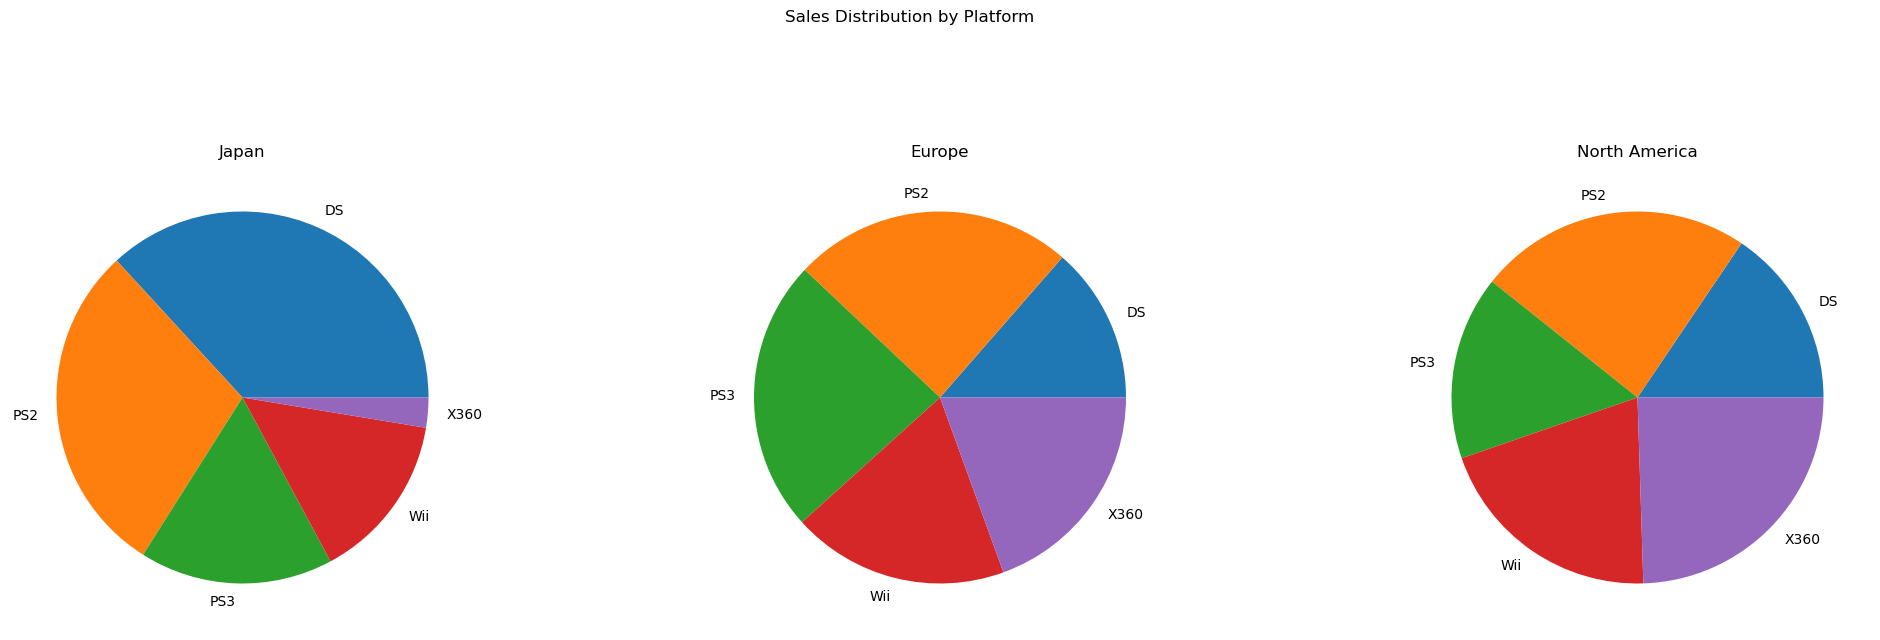

In [23]:
# Market Share based on platform
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by Platform')
plt.subplots_adjust(wspace=0.5)

ax1.pie(top_5_grouped_sales['jp_market_share'], labels=top_5_grouped_sales.index)
ax1.set_title('Japan')

ax2.pie(top_5_grouped_sales['eu_market_share'], labels=top_5_grouped_sales.index)
ax2.set_title('Europe')

ax3.pie(top_5_grouped_sales['na_market_share'], labels=top_5_grouped_sales.index)
ax3.set_title('North America')

plt.show()

**Observations**

The data illustrates that the top-selling consoles in one region may not enjoy the same level of popularity in other regions. For instance, the Nintendo DS dominated the market in Japan, yet in Europe and North America, it held the smallest market share among the top 5 highest-selling consoles (PS2, PS3, X360, Wii, DS). Conversely, the X360 dominated the market in North America, but in Japan, it held the lowest market share, while in Europe, it fell in the middle of the pack.

In [24]:
# Finding the top five genres 
top_five_genres = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=True).tail(5).index.to_list()

# Filtering out DF to only include the top 5 genres
top_5_genre_df = df_games_filtered[df_games_filtered['genre'].isin(top_five_genres)]

# Aggregating values
top_5_grouped_genre = top_5_genre_df.groupby('genre').agg({"jp_sales": "sum", "eu_sales": "sum", "na_sales": "sum"})

# Reusing function used for platform market share to find genre market_share
find_market_share('jp', top_5_grouped_genre)
find_market_share('eu', top_5_grouped_genre)
find_market_share('na', top_5_grouped_genre)

top_5_grouped_genre


,jp_sales,eu_sales,na_sales,jp_market_share,eu_market_share,na_market_share
genre,,,,,,
Action,159.94,518.35,876.74,19.904175,32.463832,30.108967
Platform,128.59,196.00,432.51,16.002738,12.275318,14.853240
Role-Playing,349.39,188.71,330.81,43.480804,11.818751,11.360663
Shooter,34.31,317.34,592.24,4.269803,19.874742,20.338680
Sports,131.32,376.30,679.59,16.342480,23.567358,23.338450


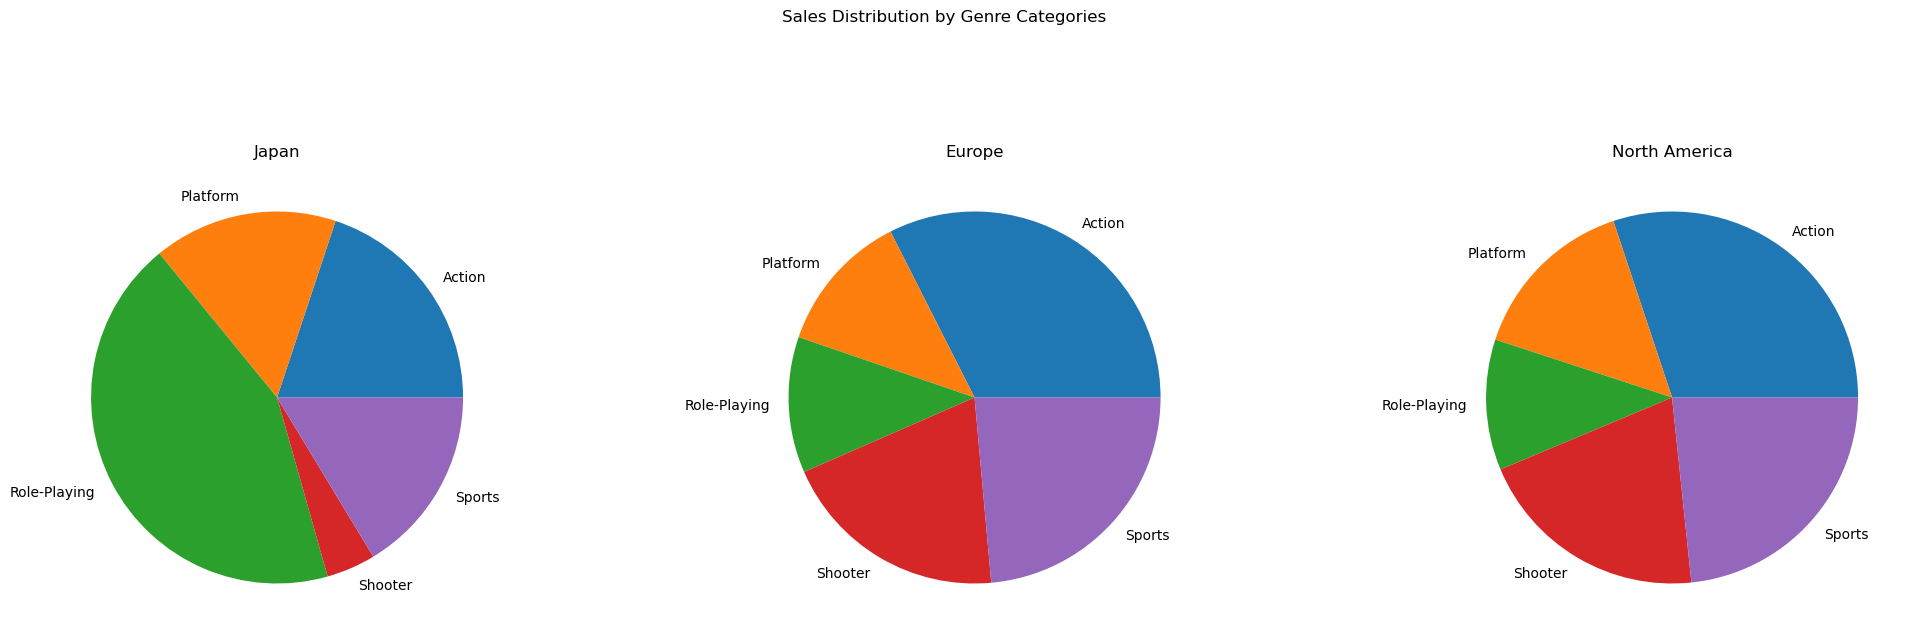

In [25]:
# Market Share based on genres
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by Genre Categories')
plt.subplots_adjust(wspace=0.5)

ax1.pie(top_5_grouped_genre['jp_market_share'], labels=top_5_grouped_genre.index)
ax1.set_title('Japan')

ax2.pie(top_5_grouped_genre['eu_market_share'], labels=top_5_grouped_genre.index)
ax2.set_title('Europe')

ax3.pie(top_5_grouped_genre['na_market_share'], labels=top_5_grouped_genre.index)
ax3.set_title('North America')

plt.show()

**Observations**

The distribution of market share among genres across different regions mirrors the trends observed with platforms. Genres popular in one region may not necessarily enjoy the same level of popularity or sales in other regions. For instance, in North America and Europe, genres like `Action`, `Shooter`, and `Sports` dominate the market, whereas in Japan, their market share is notably lower, especially for the `Shooter` genre. Conversely, the `Role-Playing` genre holds nearly half of the market share in Japan, while accounting for around 11 percent in both North America and Europe.

In [26]:
# Aggregating values
top_grouped_ratings = df_games_filtered.groupby('rating').agg({"jp_sales": "sum", "eu_sales": "sum", "na_sales": "sum"})

# Reusing function used for platform market share to find genre market_share
find_market_share('jp', top_grouped_ratings)
find_market_share('eu', top_grouped_ratings)
find_market_share('na', top_grouped_ratings)

top_grouped_ratings

,jp_sales,eu_sales,na_sales,jp_market_share,eu_market_share,na_market_share
rating,,,,,,
AO,0.00,0.61,1.26,0.000000,0.025248,0.028806
E,197.86,710.20,1291.97,15.826141,29.395330,29.536481
E10+,40.20,188.52,353.32,3.215460,7.802883,8.077455
EC,0.00,0.11,1.53,0.000000,0.004553,0.034978
K-A,1.46,0.27,2.56,0.116780,0.011175,0.058526
M,64.19,483.97,748.48,5.134337,20.031622,17.111439
RP,0.00,0.08,0.00,0.000000,0.003311,0.000000
T,149.04,426.79,759.23,11.921197,17.664930,17.357201
unknown,797.46,605.48,1215.80,63.786084,25.060947,27.795114


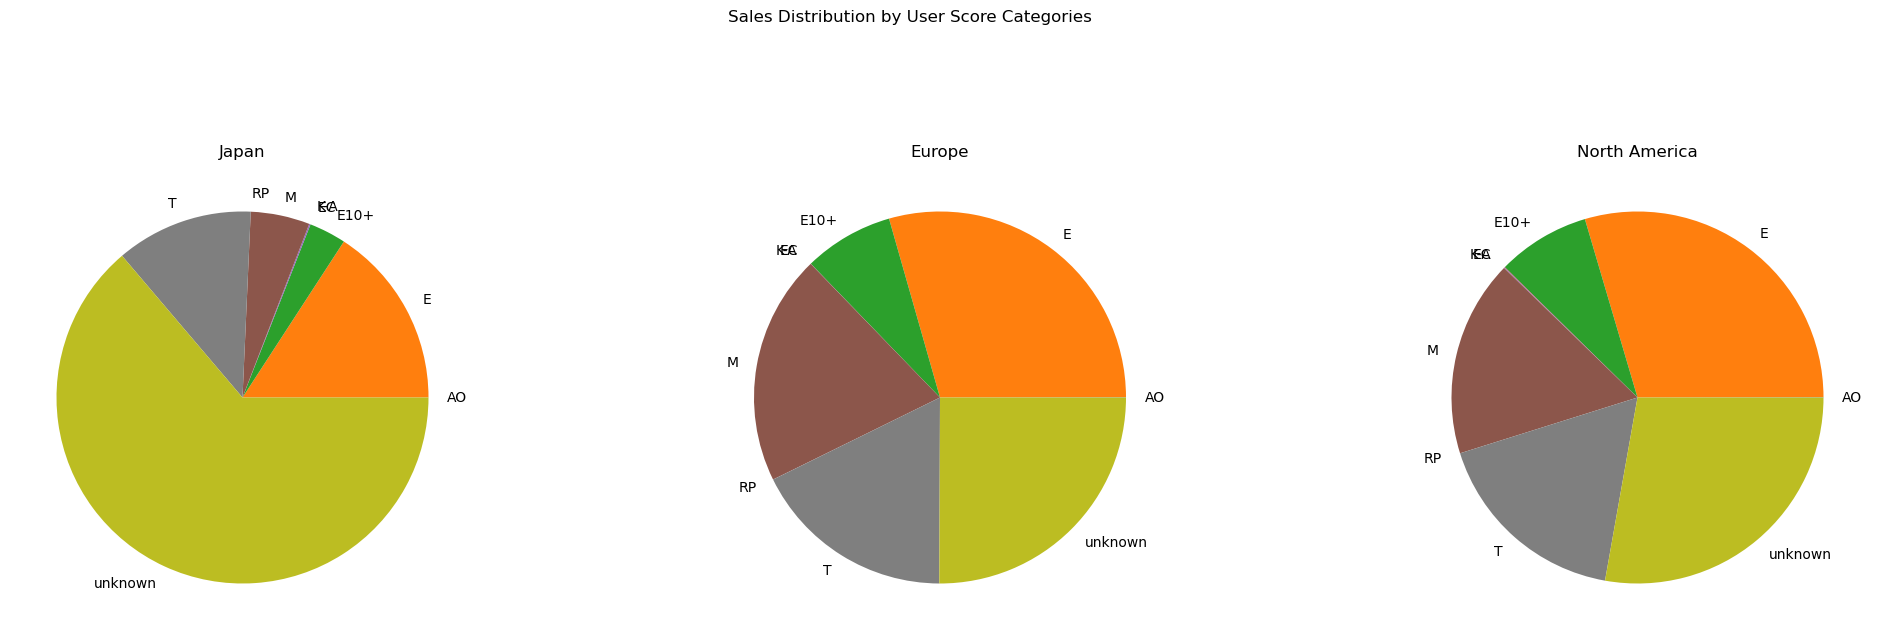

In [27]:
# Market Share based on user scores
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 8))
fig.suptitle('Sales Distribution by User Score Categories', )
plt.subplots_adjust(wspace=0.5)

ax1.pie(top_grouped_ratings['jp_market_share'], labels=top_grouped_ratings.index)
ax1.set_title('Japan')

ax2.pie(top_grouped_ratings['eu_market_share'], labels=top_grouped_ratings.index)
ax2.set_title('Europe')

ax3.pie(top_grouped_ratings['na_market_share'], labels=top_grouped_ratings.index)
ax3.set_title('North America')

plt.show()

**Observations**

There's a compelling argument to suggest that ratings indeed influence sales in certain regions. By excluding games with an "unknown" rating from consideration, we observe notable differences. In Japan, for instance, games rated "M" (Mature) sell approximately 50% less than games rated "T" (Teen) and 75% less than games rated "E" (Everyone). Conversely, in Europe and North America, this trend is less pronounced, with games rated "T" and "M" enjoying nearly equal market share in both regions. Nevertheless, it's evident that games rated "E" hold the largest market share across all regions.

This phenomenon could potentially be attributed to an oversaturation of "E"-rated games in the market. It's conceivable that this stems from the fact that video games are typically targeted towards younger demographics, including children, teenagers, and young adults.

## Hyptohesis Testing

### Testing whether or not average user ratings of the Xbox One and PC platforms are the same.

**Null Hypothesis:** 

H0: μXbox = μPC
- μPC = Represents the population mean of user ratings for the PC platform
- μXbox = Represents the population mean of user ratings for the Xbox One platform

**Alternate Hypothesis:** 

H0: μXbox ≠ μPC


**Alpha Value:** 
- 0.05 (5%)

**Explanation**
- The `null hypothesis` posited that the average user ratings for both Xbox One and PC platforms are identical, while the `alternative hypothesis` suggested they are different. A significance level of 5% was selected for testing these assumptions.

In [28]:
# Gathering samples
pc_sample = games_df[games_df['platform'] == "PC"]['user_score'].to_list()
x_one_sample = games_df[games_df['platform'] == "XOne"]['user_score'].to_list()

alpha = 0.05 # Declare alpha
_, pvalue1 = st.ttest_ind(pc_sample, x_one_sample) # unpack results

print(f"The pvalue: {pvalue1}")
if pvalue1 < alpha:
    print(f"We reject the null hypothesis at a {alpha} significance level")
else:
    print(f"We can't reject the null hypothesis at a {alpha} significance level")

The pvalue: 3.3757115109295714e-05
We reject the null hypothesis at a 0.05 significance level


### Testing whether or not average user ratings for the Action and Sports genres are different.

**Null Hypothesis:** 

H0: μAction = μSports
- μAction = Represents the population mean of user ratings for the Action genre
- μSports = Represents the population mean of user ratings for the Sports genre

**Alternate Hypothesis:** 

H0: μAction ≠ μSports


**Alpha Value:** 
- 0.05 (5%)

**Explanation**
- The `null hypothesis` posited that the average user ratings for both Action and Sports genre are identical, while the `alternative hypothesis` suggested they are different. A significance level of 5% was selected for testing these assumptions.

In [29]:
# Gathering samples
action_sample = games_df[games_df['genre'] == "Action"]['user_score'].to_list()
sports_sample = games_df[games_df['genre'] == "Sports"]['user_score'].to_list()

alpha = 0.05
results_action_sports = st.ttest_ind(action_sample, sports_sample)
_, pvalue2 = results_action_sports

print(f"The pvalue: {pvalue2}")
if pvalue2 < alpha:
    print(f"We reject the null hypothesis at a {alpha} significance level")
else:
    print(f"We can't reject the null hypothesis at a {alpha} significance level")

The pvalue: 0.18796487368578152
We can't reject the null hypothesis at a 0.05 significance level


## Conclusion

In conclusion, the analysis of the provided data offers valuable insights into trends and patterns within the video game industry over the specified period. The dataset presents a robust sample size, showcasing a significant increase in the number of game releases over the years, indicating a burgeoning and dynamic industry. Notably, platforms like PS4, GBA, and PS lead in all-time sales, with PC, PS4, and XOne emerging as growing platforms while others like X360, PS2, and Wii show signs of decline.

Further examination reveals that total sales among platforms remained relatively stable from 2015 to 2016, with outliers observed in consoles gaining popularity during that time. Interestingly, there appears to be a negligible correlation between user scores and total sales, with varying degrees of correlation observed across different gaming platforms.

Moreover, the data highlights regional variations in console and genre preferences, with top-selling consoles in one region often not mirroring popularity in others. Similarly, genre preferences vary across regions, with action-oriented games dominating in North America and Europe, while role-playing games hold a significant market share in Japan.

Additionally, there is evidence to suggest that ratings influence sales, particularly in Japan, where games rated "E" significantly outsell those with "M" ratings. However, in Europe and North America, the impact of ratings on sales is less pronounced, with games rated "E" holding the largest market share across all regions.

Overall, these observations underscore the dynamic nature of the video game industry, shaped by evolving consumer preferences, regional differences, and the interplay between ratings and sales.